# The Discrete Fourier Transform

## Starting point: the continuous-time case

As you recall, a continuous-time periodic function $f(t)$ with angular frequency $\omega_0=2 \pi f = 2 \pi / T$ can be written as 

$$f(t) = \sum_{n=-\infty}^\infty a_n e^{jn\omega_0 t}$$

Such an expression can be considered as an inverse Fourier Transform (FT), i.e. an operation going from a representation by coefficients $a_n$ in the frequency domain to a representation $f(t)$ in the time-domain.

The coefficients $a_n$ are given by

$$ a_n = \frac{1}{T} \int_0^T f(t) e ^{-jn\omega_0 t} dt$$ 

The expression above can be considered as a forward Fourier Transform, i.e. from the time domain to the frequency domain.

## Moving to discrete time

Now suppose that instead of a continuous-time function $f(t)$, we have a discrete-time signal given e.g. by a set of samples $x[k]=f(k \Delta t)$, with $\Delta t$ the sampling period. In that case, we use the Discrete Fourier Transform (DFT) rather than the regular FT. The DFT is defined as:

$$X[n] = \sum_{k=0}^{N-1} x[k] e^{-j 2 \pi k n /N}$$

To better illustrate the relationship between the DFT and FT, let's look at $-j n \omega_0 t$ in the formula for the FT. This becomes $-j n \frac{2 \pi}{T}  t = -j n \frac{2 \pi}{T} k \Delta t$. If we need $N$ samples to cover our period $T$, i.e. if $T=N \Delta t$, this becomes $-j n \frac{2 \pi}{N \Delta t} k \Delta t = -j n \frac{2 \pi}{N} k $. This is exactly what we have in the exponential in the DFT. (Note that this is a rather handwaving argument. The full derivation is more involved and relies on convolutions, delta functions and sync functions.)

Also, an expression like $-j 2 \pi f t = -j 2 \pi \frac{n}{N \Delta t} k \Delta t$ makes it crystal clear that $k$ is a temporal index, with samples separated in time by $\Delta t$, whereas $n$ is a frequency index, with different frequencies separated by $ \frac{1}{N \Delta t}$.

For the inverse DFT, we have

$$x[k]=\frac{1}{N} \sum_{n=0}^{N-1} X[n] e^{j 2 \pi k n /N}$$

So, our discrete-time signal $x[k]$ is the sum over many frequency contributions. Each term in the sum is a complex exponential $e^{j 2 \pi k n /N}$ with a complex-valued amplitude $X[n]$. This is very remininscent of what we had with phasors in the continuous time domain. There, we associated a complex amplitude to an oscillation described by a complex exponential $e^{j \omega t}$. Here, we do the same thing, but in discrete time.

(Note: There also exists something called the Discrete-Time Fourier Transform (DTFT), which is similar but different. It is used for aperiodic functions, with intergration limits from $-\infty$ to $\infty$, rather than from 0 to $T$.)

In case $N$ is a power of 2, there is a very efficient implementation of the DTF, which is called the Fast Fourier Transform (FFT).

## First numerical experiments

Let's now play around with some numerical experiments of the DFT in NumPy. Be aware that other definitions/conventions in terms of the sign in the exponential or normalisation factors are possible. The conventions used here are typical for engineering. Look up the definition used by NumPy for its DFT implementation [here](https://numpy.org/doc/stable/reference/routines.fft.html#implementation-details). What convention do they use? Note that the name FFT is so ubiquitous that the function called ```fft``` can also be used if $N$ is not a power of 2. It will then fall back on slower algorithms.

Now, start from a sine wave with frequency 2 Hz, and construct a discrete version of it by sampling at 10 points per period. Plot one period of the original function, as well as the sampled points.

In [1]:
# Your code here.

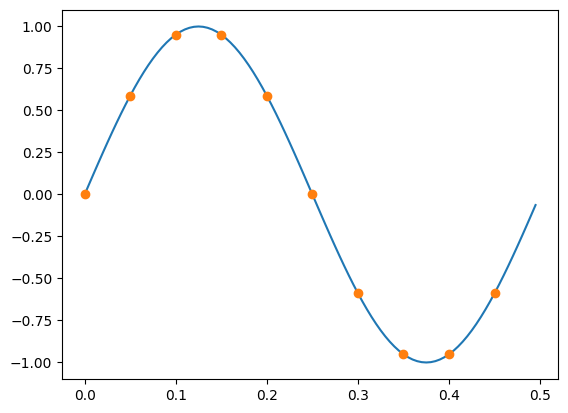

In [2]:
import numpy as np

f = 2 # Frequency of the sine wave, in Hz.
T = 1/f # Period of sine wave, in sec.

# Sampled version.
N = 10 # Number of samples
delta_t = T / N # Distance between samples.
t = np.arange(0, T, delta_t)
x = np.sin(2*np.pi*f*t)
assert len(t) == N

# High-res, quasi-continous version for comparison.
t_fine = np.arange(0, T, delta_t/10)
x_fine = np.sin(2*np.pi*f*t_fine)

import matplotlib.pyplot as plt
plt.plot(t_fine, x_fine)
plt.plot(t, x, marker='o', linestyle="None")
plt.show()

Based on the formulas above, calculate the frequencies that correspond to the different coefficients in the DFT. Then, calculate the DFT and plot the absolute values of the coefficients. Does this correspond with what you expect?

In [3]:
# Your code here.

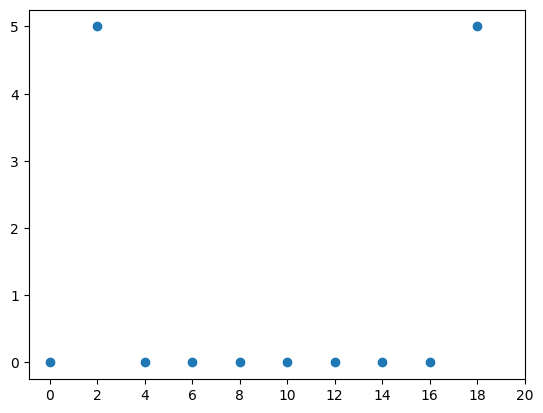

In [4]:
f = np.arange(N)/N/delta_t
X = np.fft.fft(x)
plt.plot(f, abs(X), marker="o", linestyle="None")
plt.xticks(range(0, 22, 2))
plt.show()

This is perhaps a bit bizarre, as we would expect a contribution from both a positive and a negative exponential at frequency 2 Hz, since $\sin(x)=\frac{\exp(j \omega t) - \exp(-j \omega t)}{2j}$. Take a moment to try and figure out what is going on here.

Our complex exponential for the $n$-th frequency is $e^{j 2 \pi k n /N}$, with $k$ and $n$ being  integer indices that represent time and frequency respectively. We know that if we add an integer multiple of $2 \pi$ to the argument of a complex exponential, nothing changes. It's easy to check that replacing $k$ by $k + N$, or $n$ by $n + N$ does exactly that. This results in the time being shifted from $t$ to $t + N \Delta t = t + T$, and the frequency being shifted from $f$ to $f + N \frac{1}{N \Delta t} = f +  \frac{1}{ \Delta t} $. So, the function is periodic in time with period $T$ (we already knew that!), but it's also periodic in frequency with period $\frac{1}{ \Delta t}$. Because this frequency period is the inverse of the sampling time, it's also called the **sampling frequency $f_s$**.

Write code to replace the upper half of the frequencies in the example above by equivalent frequencies that are shifted down by $\frac{1}{\Delta t}$.

In [5]:
# You code here.

In [6]:
print(f)
f_shifted = [f_i - 1/delta_t if f_i > 1/2/delta_t else f_i for f_i in f]
print(f_shifted)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]
[0.0, 2.0, 4.0, 5.999999999999999, 8.0, 10.0, -8.000000000000002, -6.000000000000002, -4.0, -2.0]


There is actually a  function ```np.fft.fftfreq``` that generates this array directly. Look up its [documentation](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html) and verify it gives the same result as your own code above.

In [7]:
# Your code here.

In [8]:
print(f_shifted)
f_shifted_2 = np.fft.fftfreq(n=N, d=delta_t)
print(f_shifted_2)

[0.0, 2.0, 4.0, 5.999999999999999, 8.0, 10.0, -8.000000000000002, -6.000000000000002, -4.0, -2.0]
[  0.   2.   4.   6.   8. -10.  -8.  -6.  -4.  -2.]


Finally, it would be nice to reorder both the array of the frequencies and the array of FFT coefficients such that zero is in the middle. This can be accomplished by a cyclic shift (i.e. the elements that 'fall out' of the array on the right-hand side, reenter the array from the left), and this is implemented by ```np.fft.fftshift``` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)). Do that, and replot the results.

In [9]:
# Your code here.

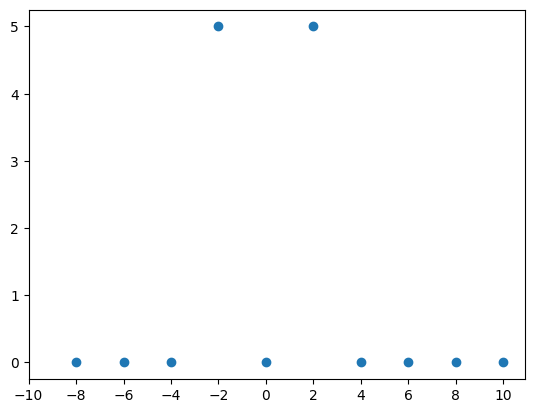

In [10]:
plt.plot(np.fft.fftshift(f_shifted), abs(np.fft.fftshift(X)), marker="o", linestyle="None")
plt.xticks(range(-10, 12, 2))
plt.show()

This results in what we intuitively expected.

# Digging a bit deeper

So far, we've only looked at the magnitude of the FFT, but let's now plot the real part and the imaginary part separately. What do you expect?

In [11]:
# Your code here.

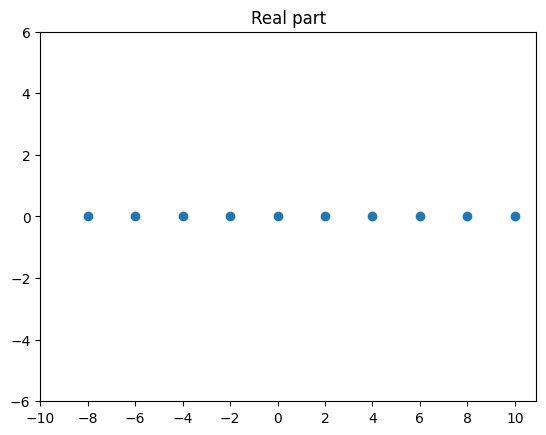

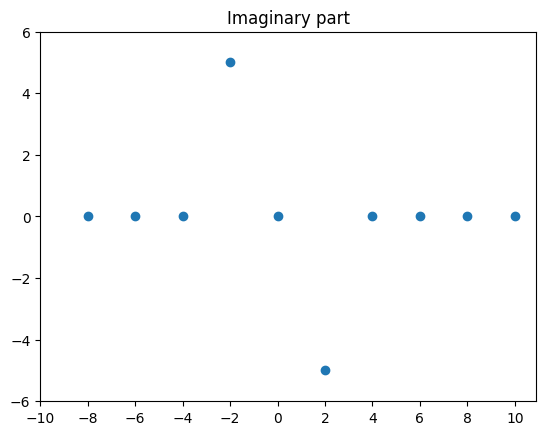

In [12]:
plt.plot(np.fft.fftshift(f_shifted), np.real(np.fft.fftshift(X)), marker="o", linestyle="None")
plt.xticks(range(-10, 12, 2))
plt.title("Real part")
plt.ylim(-6, 6)
plt.show()

plt.plot(np.fft.fftshift(f_shifted), np.imag(np.fft.fftshift(X)), marker="o", linestyle="None")
plt.xticks(range(-10, 12, 2))
plt.ylim(-6, 6)
plt.title("Imaginary part")
plt.show();

Since $\sin(x)=\frac{\exp(j \omega t) - \exp(-j \omega t)}{2j}$, we indeed expect that the coefficients of the complex exponentials should be purely imaginary, which a negative imaginary part of the coefficients for positive frequencies and a positive one for negative frequencies. As for the size of the amplitudes, we expected 0.5 and not 5, but remember that in the formula to go back to the time domain, there is a factor $1/N$, which is 1/10 in this case:

$$x[k]=\frac{1}{N} \sum_{n=0}^{N-1} X[n] e^{j 2 \pi k n /N}$$

Finally, in case your original time sequence only consists of real values, what can you then conclude in general about the real and imaginary part of the FFT coefficients?

Looking back at the formula for the DFT, we have

$$X[n] = \sum_{k=0}^{N-1} x[k] e^{-j 2 \pi k n /N}$$

It's easy to see that $X[-n] = X[n]^*$ in case $x[k]$ is real.

This means that $\Re X[-n] + j \Im  X[-n] = \Re X[n] - j \Im  X[n]$. So, the real part is even, and the imaginary part is odd, which is what we had in our concrete example above as well.

## Playing around with frequency range and resolution

First, rewrite the code to plot the samples and the magnitude of the FFT as a function, so that you can more easily use it to explore different scenarios. You can use e.g. the following signature:

In [13]:
def plot_dft(f_t, T, N):
    
    # Your code to plot the sampled function f_t.
    
    # Your code to to plot the DFT.
    
    pass

f = 2
plot_dft(lambda t : np.sin(2*np.pi*f*t), T=0.5, N=10)

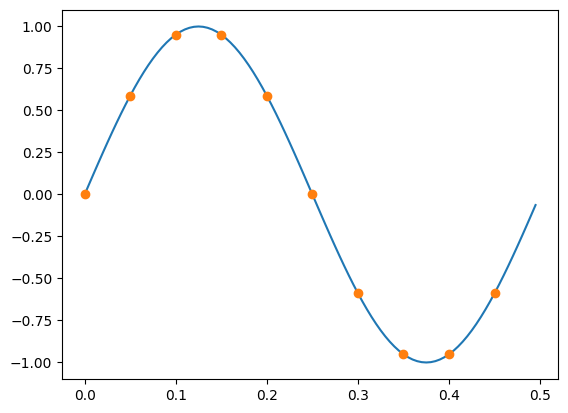

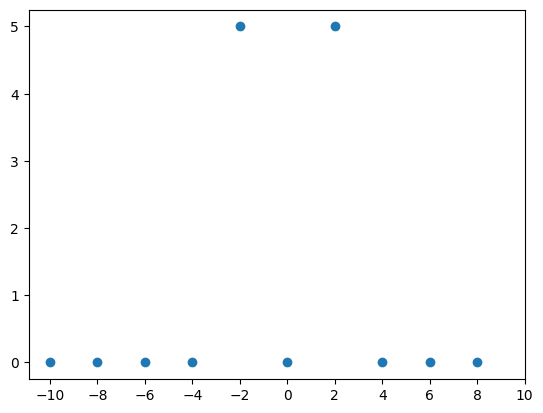

In [14]:
def plot_dft(f_t, T, N):
    
    # Plot the sampled function f_t.
    
    delta_t = T / N # Distance between samples.
    t = np.arange(0, T, delta_t)
    x = f_t(t)

    # High-res, quasi-continous version for comparison.
    t_fine = np.arange(0, T, delta_t/10)
    x_fine = f_t(t_fine)

    import matplotlib.pyplot as plt
    plt.plot(t_fine, x_fine)
    plt.plot(t, x, marker='o', linestyle="None")
    plt.show()
    
    # Plot the DFT.
    
    f = np.fft.fftshift(np.fft.fftfreq(n=N, d=delta_t))
    X = abs(np.fft.fftshift(np.fft.fft(x)))               
    plt.plot(f, X, marker="o", linestyle="None")
    
    # Make sure 0 is in the middle of the figure.
    f_symmetric = list(f) + [-f[0]]
    plt.xticks(f_symmetric)
    plt.show()
    
f = 2    
plot_dft(lambda t : np.sin(2*np.pi*f*t), T=0.5, N=10)

Starting from the example we have studied above, investigate what happens if you sample two periods of the function rather than just one, but keeping the same distance between samples. What do you expect based on the formulas? Do the numerical experiments confirm this?

In [15]:
# Your code here.

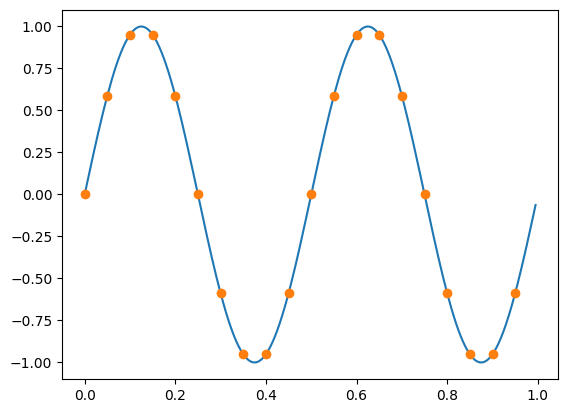

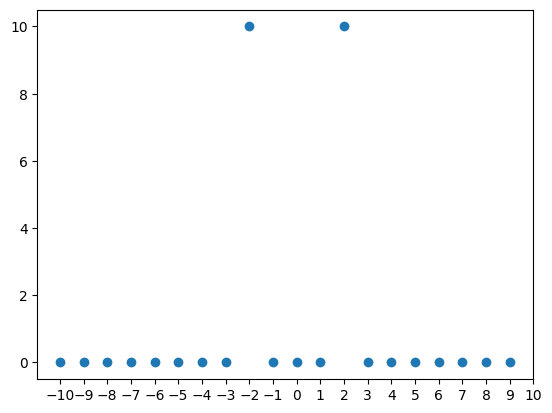

In [16]:
f = 2    
plot_dft(lambda t : np.sin(2*np.pi*f*t), T=1, N=20)

From our discussion above, we know that the frequencies are $\frac{n}{N \Delta t}$, and have a range $\frac{1}{\Delta t}$ after which they repeat. 

In this case, $\Delta t$ stays the same, and the plots indeed confirm that the range of frequencies hasn't changed. However, $N$ has increased, which results in frequencies that are closer together. I.e., the frequency resolution has increased.

Next up, restrict your sampling back to a single period, but this time halve the sampling interval. What happens?

In [17]:
# Your code here.

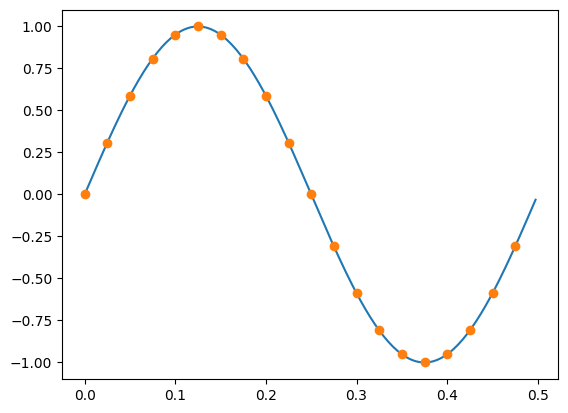

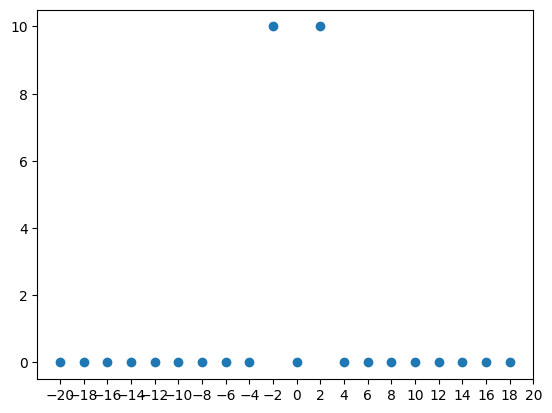

In [18]:
f = 2    
plot_dft(lambda t : np.sin(2*np.pi*f*t), T=0.5, N=20)

Since $\Delta t$ is halved, the range of frequencies is doubled. At the same time $N$ is doubled, so these two effects cancel in the formula for the resolution, which therefore stays the same.

So, **to summarise the important conclusions** we've seen:

- The frequencies in the DFT periodically repeat with a period equal to the sampling frequency $f_s=1/\Delta t$. If we choose to have zero as the center frequency, this results in a frequency range of $[-f_s/2, f_s/2]$.
- The frequency resolution is given by  $\Delta f = \frac{1}{N \Delta t} = \frac{1}{N \frac{T}{N}} = \frac{1}{T}$.

## Aliasing and the Nyquist criterion

We started out by doing the DFT of a sine wave with frequency $f=2$ Hz, using $N=10$ samples to cover a duration of $T=1/f=0.5$ seconds. Since the time interval $\Delta t$ between samples is $T/N=0.05$ seconds, we know that the frequencies in the DFT are only defined up to multiples of $1/\Delta t = 20$ Hz.

Let's now use the same numerical parameters $N$ and $T$, and do the DFT of a sine wave of frequency 22 Hz. (Note that we'll still use $T=0.5$ seconds, so $T$ is not related to the frequency of the new sine wave anymore.)

Update the parameters of your function to plot the results, and try to explain them.

In [19]:
# Your code here

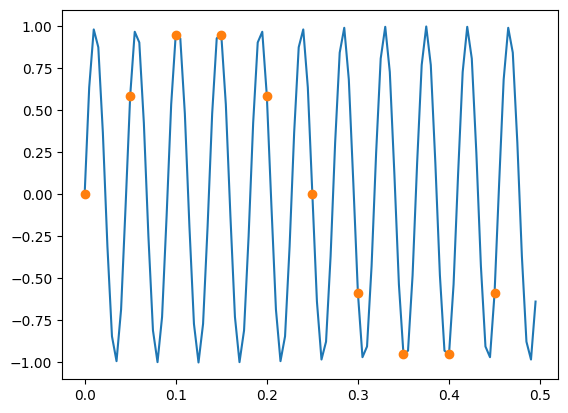

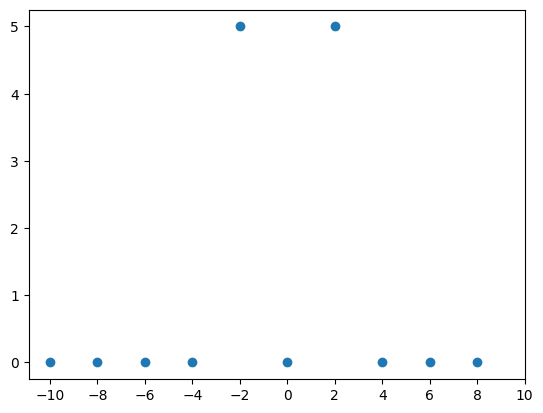

In [21]:
f=22
plot_dft(lambda t : np.sin(2*np.pi*f*t), T=0.5, N=10)

So, rather than ending up with a frequency of 22 Hz, which would be beyond our frequency range of 20 Hz anyhow, we end up with a frequency of 22-20=2 Hz. The time domain graph also clearly shows that the samples lie on a sine wave with a much lower frequency than the frequency of the original signal.

Let's now try a freqency of 12 Hz. 12 is smaller than 20, right? So, hopefully things go better now...

In [ ]:
# Your code here

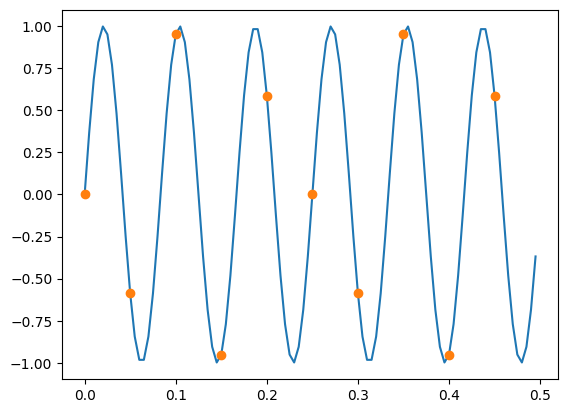

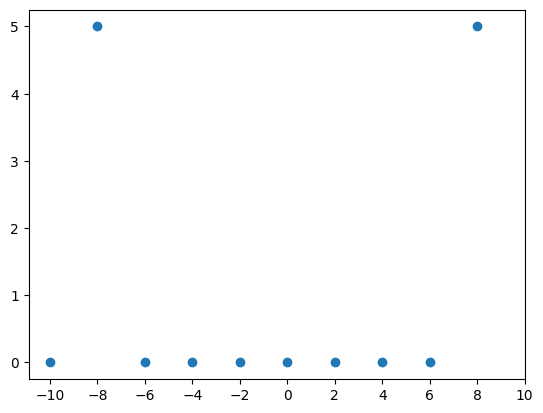

In [25]:
f=12
plot_dft(lambda t : np.sin(2*np.pi*f*t), T=0.5, N=10)

Rather than 12 Hz, we end up with 8 Hz. However, if we do 12-20, we get -8 Hz, so this mix-up is still consistent with having only a limited frequency range of 20 Hz that periodically repeats.

The fact that high frequencies end up being mistaken for lower frequencies is called **aliasing**.

Based on the examples we've seen so far, it seems that because of a limited range of frequencies $[-f_s/2,f_s/2]$ that periodically repeats, in order to get reliable results, the frequency of the signal that we're interested in should be lower than $f_s/2$.

What if the signal frequency is exactly $f_s/2$? 

In [ ]:
# Your code here.

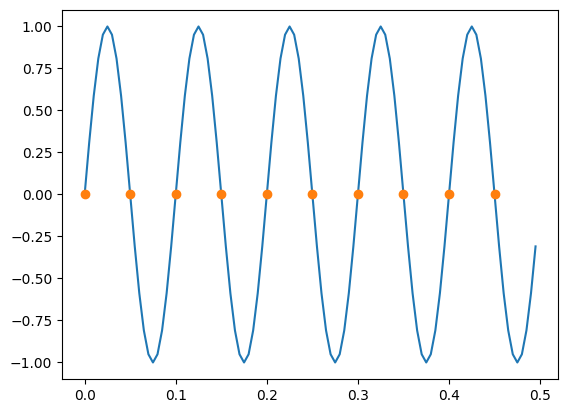

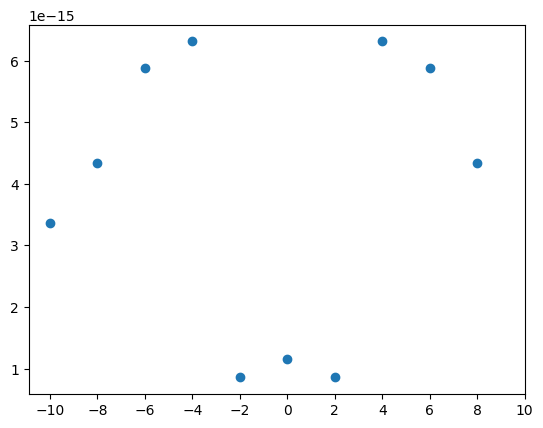

In [26]:
f=10
plot_dft(lambda t : np.sin(2*np.pi*f*t), T=0.5, N=10)

This is a pathological edge case: the samples all end up at zero.

So, to summarise: **the DFT only gives reliable, i.e. non-aliased results for signal frequencies $f \lt f_s/2$**.

This is called the **Nyquist criterion**, and $f_s/2$ is the Nyquist frequency. Rather than Nyquist, you sometimes can also hear the name of **Shannon** instead. 